## **Kaggle Competicion** 
### Store Sales - Time Series Forecasting

In [31]:
# Importamos las librerias 
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt

In [4]:
holidays_events = pd.read_csv('./holidays_events.csv')
oil = pd.read_csv('./oil.csv')
sample_submission = pd.read_csv('./sample_submission.csv')
stores = pd.read_csv('./stores.csv')
test = pd.read_csv('./test.csv')
train = pd.read_csv('./train.csv')
transactions = pd.read_csv('./transactions.csv')

### 1. EDA 

* Identificamos por los datos proporcionados y el estudio realizado en los datos, la variable objetivo es "sales", por lo que enfocamos todo el estudio a predecir esta variable lo mejor posible y como todas las variables son capaces de predecir esta.

In [14]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


#### 1.1 Columnas

In [25]:
train.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
- store_nbr = identifies the store at which the products are sold.
- family = identifies the type of product sold.
- sales = gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in - fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
- onpromotion = gives the total number of items in a product family that were being promoted at a store at a given date.

#### 1.2 Estadísticas Descriptivas:

In [17]:
train.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


1. Venta minima = 0 unidades 
2. Venta maxima =  124,717 unidades
3. La media me dice que se venden 358 unidades por dia
4. El 26% de las ventas se realizaron onpromotion
5. Vemos que tengo una media de 358 unidades  y la mediana (percentil 50%) es de 11 unidades [Se observa una discrepancia entre la media y la mediana de las ventas. Mientras que la media de 358 unidades sugiere un valor promedio relativamente alto, la mediana de 11 unidades indica que la mitad de las observaciones tienen un valor igual o inferior a 11 unidades. Esta discrepancia sugiere una posible presencia de valores extremos o sesgo en la distribución de las ventas]

#### 1.3 Tipos de Datos:

In [22]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


- date es de tipo object (Hay que convertirlo a tipo datetime)
- sales es float, lo que esta bien ya que puede contener decimales
- onpromotion es de tipo entero, pero es binaria, por lo que puede ser mejor pasarlo a tipo booleano

## Visualizacion de datos 


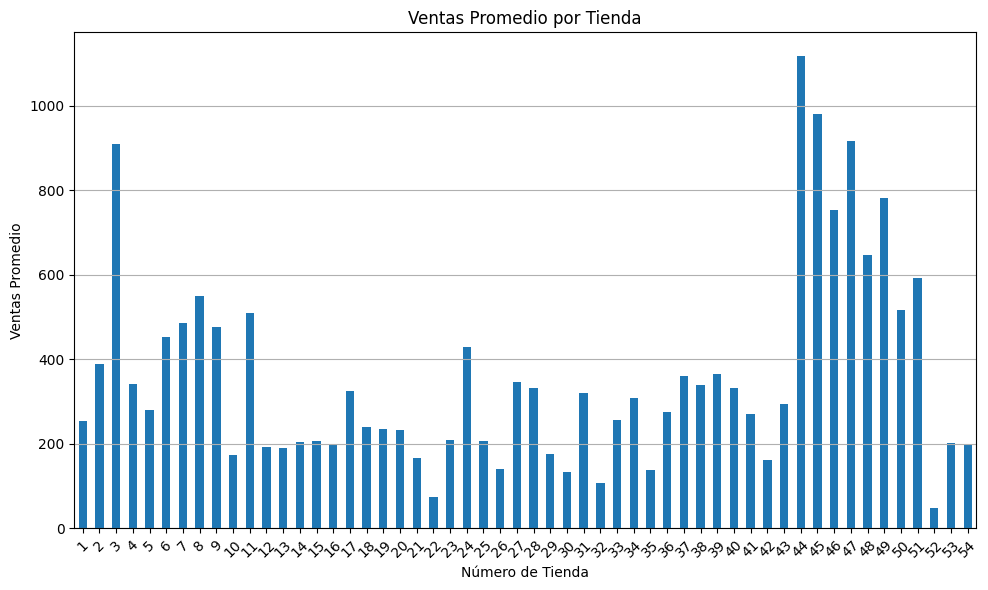

In [32]:
# Calcula las ventas promedio por tienda
ventas_promedio_por_tienda = train.groupby('store_nbr')['sales'].mean()

# Crea el gráfico de barras
plt.figure(figsize=(10, 6))
ventas_promedio_por_tienda.plot(kind='bar')
plt.title('Ventas Promedio por Tienda')
plt.xlabel('Número de Tienda')
plt.ylabel('Ventas Promedio')
plt.xticks(rotation=45)
plt.grid(axis='y')  # Añade líneas de referencia horizontal
plt.tight_layout()  # Ajusta la disposición del gráfico
plt.show()

Del gráfico de barras que muestra las ventas promedio por tienda, podrías extraer varias conclusiones y observaciones, como:

- Variabilidad en las Ventas: Observarás que algunas tiendas tienen ventas promedio más altas que otras. Esto puede indicar diferencias en el desempeño de las tiendas o en las estrategias de ventas.

- Identificación de Tiendas Destacadas: Puedes identificar tiendas que sobresalen en términos de ventas promedio. Estas tiendas podrían ser objeto de un análisis más detallado para comprender qué prácticas o factores contribuyen a su éxito.

- Identificación de Tiendas con Bajas Ventas: Del mismo modo, puedes identificar tiendas que tienen ventas promedio más bajas. Estas tiendas podrían requerir una atención especial para mejorar su desempeño.

- Patrones de Ventas por Tienda: Puedes observar patrones o tendencias en las ventas promedio a lo largo de las tiendas. Por ejemplo, algunas tiendas podrían tener ventas consistentemente altas o bajas, mientras que otras podrían mostrar fluctuaciones estacionales o tendencias a lo largo del tiempo.

- Comparación con Metas o Expectativas: Puedes comparar las ventas promedio de cada tienda con metas o expectativas previamente establecidas para evaluar su desempeño en relación con los objetivos de ventas.

#### Visualizar las Ventas a lo Largo del Tiempo:

In [33]:
# Convierte la columna 'date' a tipo datetime si no está en ese formato
train['date'] = pd.to_datetime(train['date'])

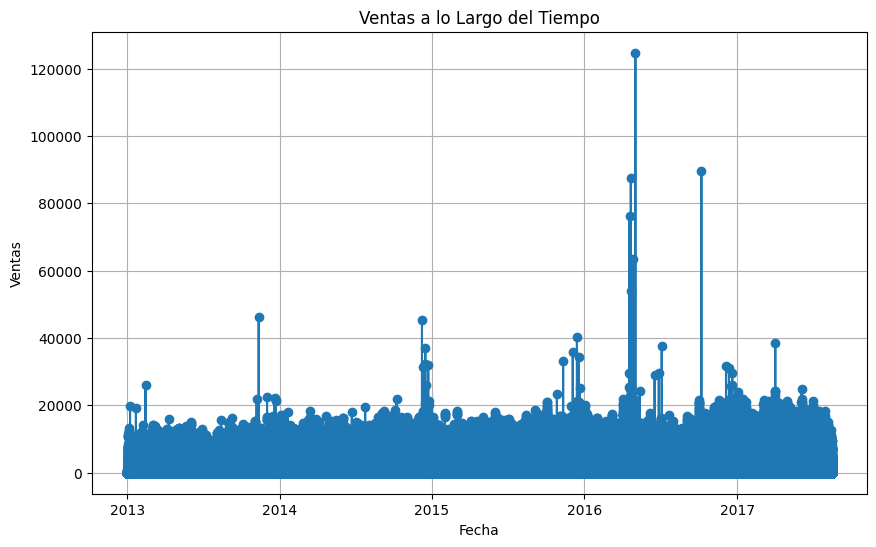

In [37]:
# Crea un gráfico de líneas para visualizar las ventas a lo largo del tiempo
plt.figure(figsize=(10, 6))
plt.plot(train['date'], train['sales'], marker='o', linestyle='-')
plt.title('Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

### Visualizar las Ventas en Diferentes Tiendas:

In [38]:
import seaborn as sns

# Crea un gráfico de barras para visualizar las ventas promedio por tienda
plt.figure(figsize=(12, 6))
sns.barplot(x='store_nbr', y='sales', data=df)
plt.title('Ventas Promedio por Tienda')
plt.xlabel('Número de Tienda')
plt.ylabel('Ventas Promedio')
plt.xticks(rotation=45)
plt.show()

ModuleNotFoundError: No module named 'seaborn'